In [1]:
from tensorflow.keras.applications.vgg19 import VGG19

vgg = VGG19(include_top=False, weights='imagenet')
for layer in vgg.layers:
    print(f'{layer.name} --> {layer.output_shape}')

input_1 --> [(None, None, None, 3)]
block1_conv1 --> (None, None, None, 64)
block1_conv2 --> (None, None, None, 64)
block1_pool --> (None, None, None, 64)
block2_conv1 --> (None, None, None, 128)
block2_conv2 --> (None, None, None, 128)
block2_pool --> (None, None, None, 128)
block3_conv1 --> (None, None, None, 256)
block3_conv2 --> (None, None, None, 256)
block3_conv3 --> (None, None, None, 256)
block3_conv4 --> (None, None, None, 256)
block3_pool --> (None, None, None, 256)
block4_conv1 --> (None, None, None, 512)
block4_conv2 --> (None, None, None, 512)
block4_conv3 --> (None, None, None, 512)
block4_conv4 --> (None, None, None, 512)
block4_pool --> (None, None, None, 512)
block5_conv1 --> (None, None, None, 512)
block5_conv2 --> (None, None, None, 512)
block5_conv3 --> (None, None, None, 512)
block5_conv4 --> (None, None, None, 512)
block5_pool --> (None, None, None, 512)


#### Gram matrix
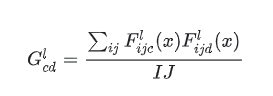

In [2]:
content_img = 'resource/penguin.jpeg'
style_img = 'resource/style1.jpg'

#### Plot the original content image and style image

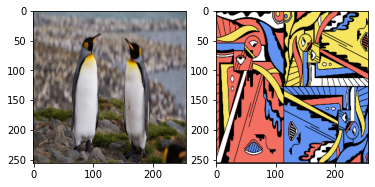

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
%matplotlib inline

content_img = cv2.resize(cv2.imread(content_img), (256, 256)) # load the image and resize to 256 x 256
content_img = tf.image.convert_image_dtype(content_img, tf.float32) # normalize the image pixel between 0 and 1
style_img = cv2.resize(cv2.imread(style_img), (256, 256))
style_img = tf.image.convert_image_dtype(style_img, tf.float32)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(np.array(content_img), cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(np.array(style_img), cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

#### Calculating the loss object
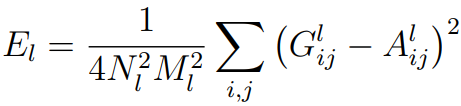
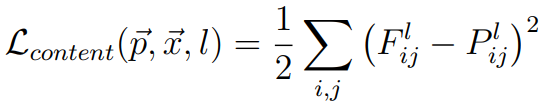

In [5]:
from utils.utils import load_pre_trained_model

local_weights = 'resource/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5'
model = load_pre_trained_model(local_weights)
content_target = model(np.array([content_img * 255]))[0]
style_target = model(np.array([style_img * 255]))[1]

#### Train the model

In [6]:
import time
from utils.utils import train_step

epochs = 1000
img = tf.image.convert_image_dtype(content_img, tf.float32) # convert image value to range 0 and 1
img = tf.Variable([img]) # convert the constant image pixel to tf variable for backprop to happen
start = time.time()
for i in range(epochs):
    train_step(img, i, style_target, content_target, optimizer, model, start)
end = time.time()
print(f'Time taken for {epochs} epochs = {round(end - start, 2)} s')

Epoch 0 : Loss = 88952045568.0
Epoch 100 : Loss = 2391000832.0
Epoch 200 : Loss = 1051994112.0
Epoch 300 : Loss = 614251136.0
Epoch 400 : Loss = 420532704.0
Epoch 500 : Loss = 310546464.0
Epoch 600 : Loss = 244549904.0
Epoch 700 : Loss = 202546416.0
Epoch 800 : Loss = 173864032.0
Epoch 900 : Loss = 153203632.0
Time taken for 1000 epochs = 106.5 s


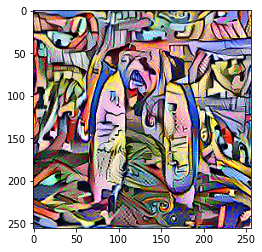

In [7]:
import PIL

tensor = img * 255
tensor = np.array(tensor, dtype=np.uint8)
if np.ndim(tensor) > 3:
  assert tensor.shape[0] == 1
  tensor = tensor[0]
tensor =  PIL.Image.fromarray(tensor)
plt.imshow(cv2.cvtColor(np.array(tensor), cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
model.save('model.h5')

In [20]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format keras '/model.h5' '/model'

You should consider upgrading via the 'C:\Users\micha\anaconda3\python.exe -m pip install --upgrade pip' command.
Traceback (most recent call last):
  File "C:\Users\micha\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\micha\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\micha\anaconda3\Scripts\tensorflowjs_converter.exe\__main__.py", line 7, in <module>
  File "C:\Users\micha\anaconda3\lib\site-packages\tensorflowjs\converters\converter.py", line 813, in pip_main
    main([' '.join(sys.argv[1:])])
  File "C:\Users\micha\anaconda3\lib\site-packages\tensorflowjs\converters\converter.py", line 817, in main
    convert(argv[0].split(' '))
  File "C:\Users\micha\anaconda3\lib\site-packages\tensorflowjs\converters\converter.py", line 803, in convert
    _dispatch_converter(input_format, output_format, args, quantization_dtype_map,
  File "C:\Users\micha\anaconda3\lib\site-